In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython
import pickle
np.random.seed(42)

In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, transform_pd

from agent import Person

from model import VirusModel, VirusModel_baseline


In [3]:
parameters_mlp = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'clf_det0_6.pkl', # None, 'hist'
    'expi': None,
    'fraud_det': 0,
    'fairness_metrics' : True
    
}

In [4]:
parameters_mlp_decorr = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'clf_det0_decorFalse2.pkl', # None, 'hist'
    'expi': None,
    'fraud_det': 0,
    'fairness_metrics' : True
    
}

In [5]:
parameters_proba = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': None,
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}


In [6]:
parameters_proba_appeal = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}


In [7]:
parameters_mlpdec_appeal = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'clf_det0_decorFalse2.pkl', # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}

In [8]:
parameters_mlp_appeal = {
    'my_parameter':42,
    'agents':200,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'clf_det0_6.pkl', # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}

In [9]:
# exp1 = ap.Experiment(VirusModel_baseline, parameters_mlp, iterations =10, record=True)
# results_baseline = exp1.run() 
# df_baseline = results_baseline['variables']['Person']
# df_baseline_mlp = transform_pd(df_baseline)

# with open('parameters_mlp.pkl', "wb") as f:
#     pickle.dump(df,f) 


# exp2 = ap.Experiment(VirusModel_baseline, parameters_proba, iterations =10, record=True)
# results = exp2.run() 
# df = results['variables']['Person']
# df_proba = transform_pd(df)
# with open('parameters_proba.pkl', "wb") as f:
#     pickle.dump(df,f) 


# exp2 = ap.Experiment(VirusModel_baseline, parameters_mlp_appeal, iterations =10, record=True)
# results = exp2.run() 
# df = results['variables']['Person']
# df_mlp_appeal = transform_pd(df)
# with open('parameters_mlp_appeal.pkl', "wb") as f:
#     pickle.dump(df,f) 

# exp2 = ap.Experiment(VirusModel_baseline, parameters_proba_appeal, iterations =10, record=True)
# results = exp2.run() 
# df = results['variables']['Person']
# df_proba_appeal = transform_pd(df)
# with open('parameters_proba_appeal.pkl', "wb") as f:
#     pickle.dump(df,f) 

exp2 = ap.Experiment(VirusModel_baseline, parameters_mlpdec_appeal, iterations =10, record=True)
results = exp2.run() 
df = results['variables']['Person']
df_proba_appeal = transform_pd(df)
with open('parameters_mlpdec_appeal.pkl', "wb") as f:
    pickle.dump(df,f) 

exp2 = ap.Experiment(VirusModel_baseline, parameters_mlp_decorr, iterations =10, record=True)
results = exp2.run() 
df = results['variables']['Person']
df_proba_appeal = transform_pd(df)
with open('parameters_mlp_decorr.pkl', "wb") as f:
    pickle.dump(df,f) 


dfs = [df_baseline_mlp, df_mlp_appeal, df_proba, df_proba_appeal]


df

Scheduled runs: 10
using pretrained clf
Completed: 1, estimated time remaining: 0:55:17using pretrained clf
Completed: 2, estimated time remaining: 0:48:59using pretrained clf
Completed: 3, estimated time remaining: 0:42:42using pretrained clf


KeyboardInterrupt: 

In [31]:
with open('df_ None _appeal.pkl', "rb") as f:
    proba_appeal = pickle.load(f) 

with open('df_ None _None.pkl', "rb") as f:
    proba = pickle.load(f) 

with open('df_ clf_det0_decorFalse2.pkl _appeal.pkl', "rb") as f:
    mlp_appeal = pickle.load(f) 

with open('parameters_mlp.pkl', "rb") as f:
    mlp = pickle.load(f) 



In [49]:
mlp = transform_pd(mlp)
mlp_appeal = transform_pd(mlp_appeal)
proba_appeal = transform_pd(proba_appeal)
proba = transform_pd(proba)

data = [mlp, mlp_appeal, proba, proba_appeal]

/Users/uni/Documents/Git/abm/basic/utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['misclassifications'] = abs(df_baseline['fraud_pred'] - df_baseline['fraud'])


## Visualization

In [70]:
def viz2(data, y):
    fig, axes = plt.subplots(2,2)

    for i, ax in zip(data, axes.flat):
        sns.lineplot(data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    ax = ax,
                    marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()

def viz(data, y, hue, title = None):
    fig, axes = plt.subplots(2,2)
    no = 0
    for i, ax in (zip(data, axes.flat)):
        
        # no +=1
        sns.lineplot(ax = ax,
                    data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    hue = hue,
                    marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)
        # title = ('{}').format(no)
        # ax.title.set_text(title)

    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

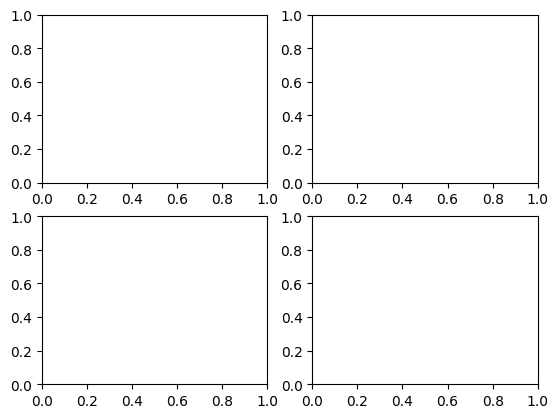

In [41]:
fig, axes = plt.subplots(2,2)

for no, i in enumerate([mlp, proba]):
    ax = axes[no-1]
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_gender'], ax = ax)

    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_gender'])
    # # plt.ylim(0,0.2)
    # plt.xlim(0,50)

plt.show()



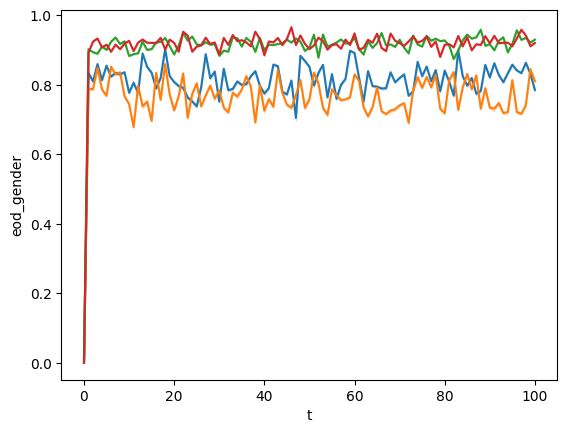

In [42]:
bsns.lineplot(   x =  mlp.index.get_level_values('t'),
                y = mlp['eod_gender'])

sns.lineplot(   x =  mlp.index.get_level_values('t'),
                y = mlp['eod_race'])
sns.lineplot(   x =  mlp.index.get_level_values('t'),
                y = mlp['dpd_race'])
sns.lineplot(   x =  mlp.index.get_level_values('t'),
                y = mlp['dpd_gender'])
# # plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

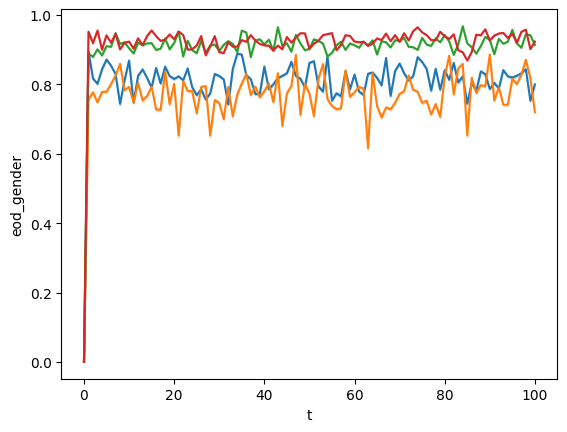

In [43]:
sns.lineplot(   x =  proba.index.get_level_values('t'),
                y = proba['eod_gender'])

sns.lineplot(   x =  proba.index.get_level_values('t'),
                y = proba['eod_race'])
sns.lineplot(   x =  proba.index.get_level_values('t'),
                y = proba['dpd_race'])
sns.lineplot(   x =  proba.index.get_level_values('t'),
                y = proba['dpd_gender'])
# # plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

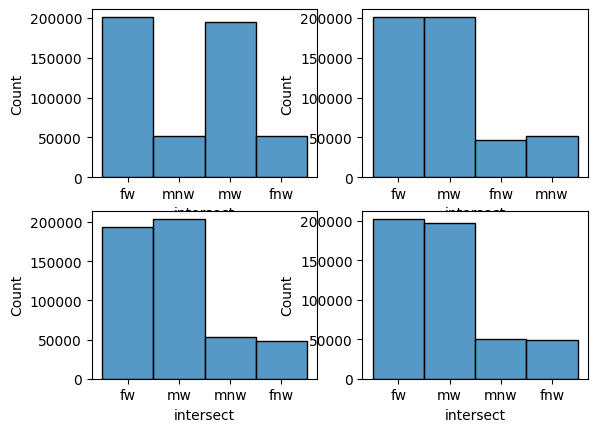

In [51]:
fig, axes = plt.subplots(2,2)

for i, ax in zip(data, axes.flat):
    sns.histplot(i['intersect'], ax = ax)
    # # plt.ylim(0,0.2)
    # plt.xlim(0,50)

plt.show()



NameError: name 'df_baseline' is not defined

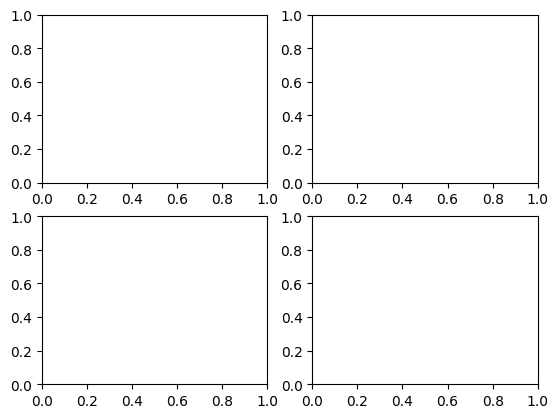

In [33]:
fig, ax = plt.subplots(2,2)

for i in dfs:
    viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

    # # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()


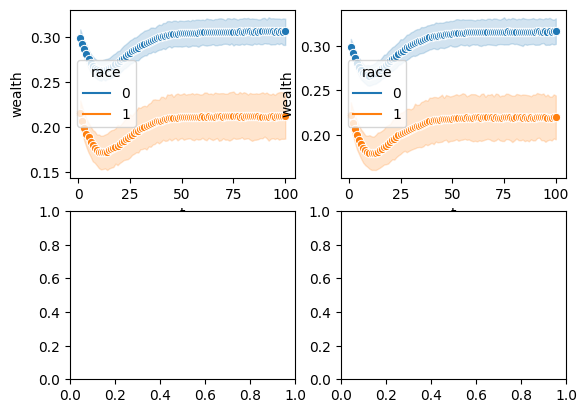

In [76]:
viz([proba_appeal, proba], 'wealth', 'race')

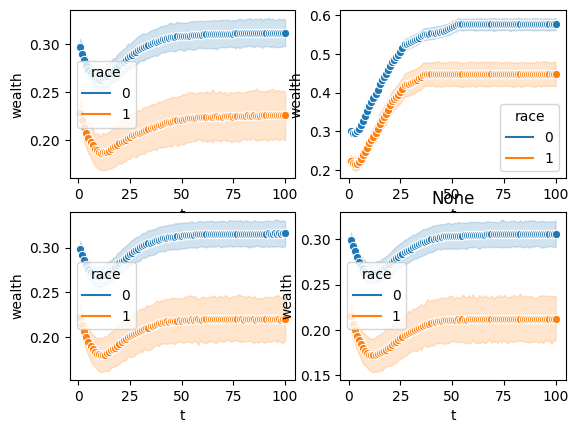

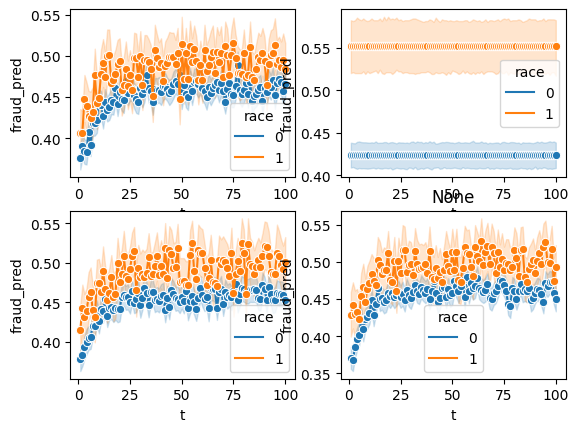

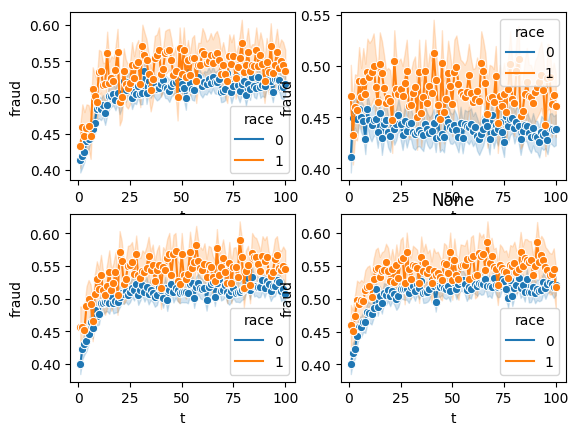

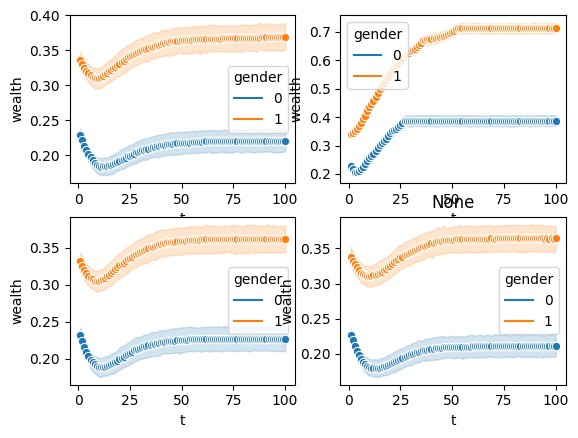

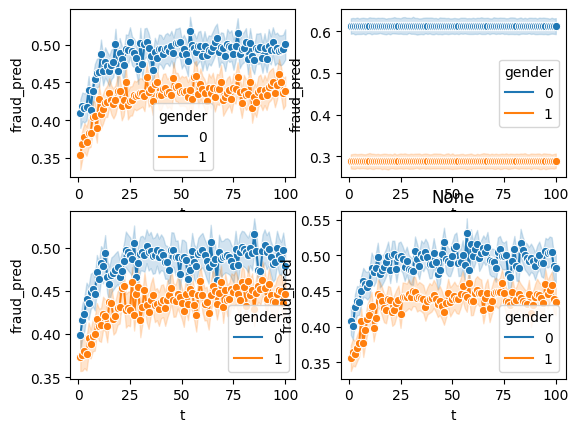

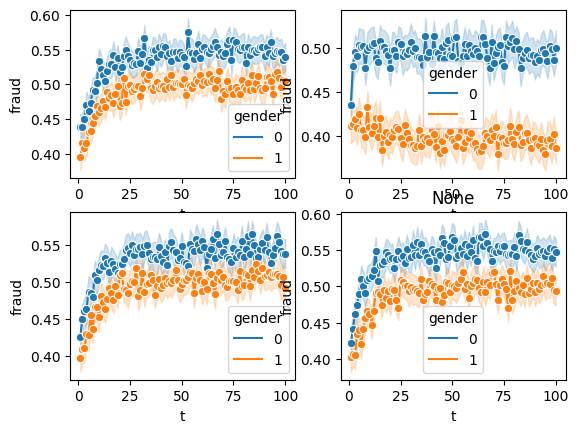

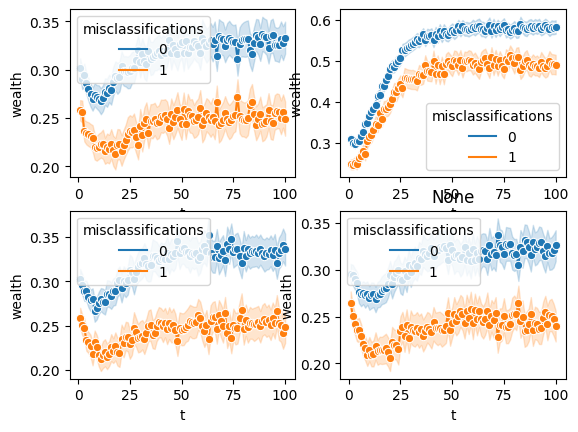

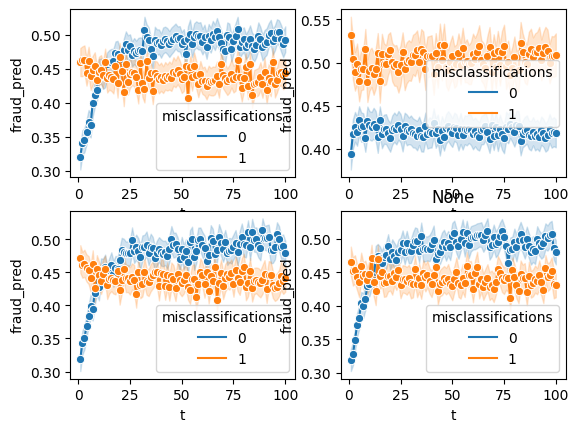

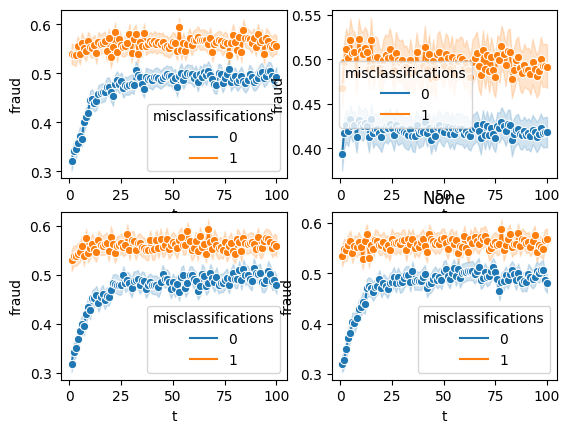

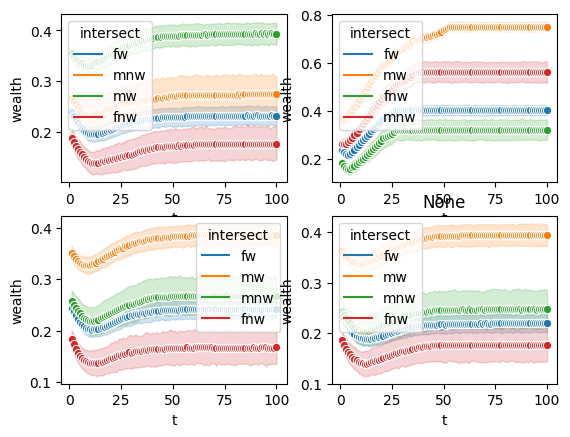

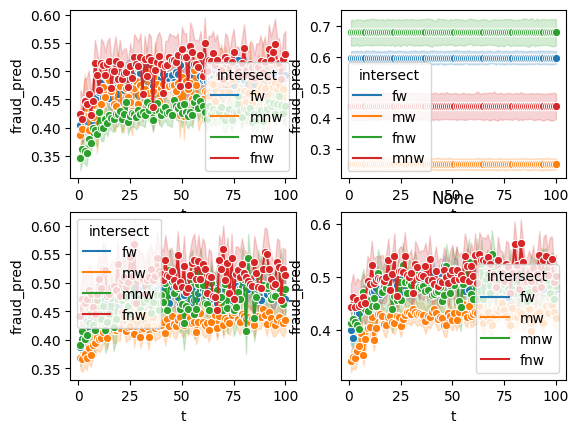

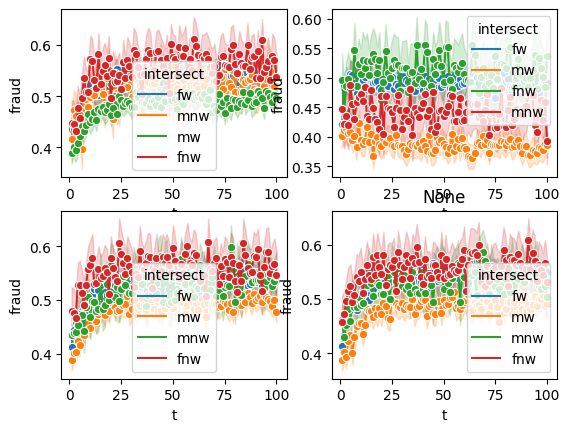

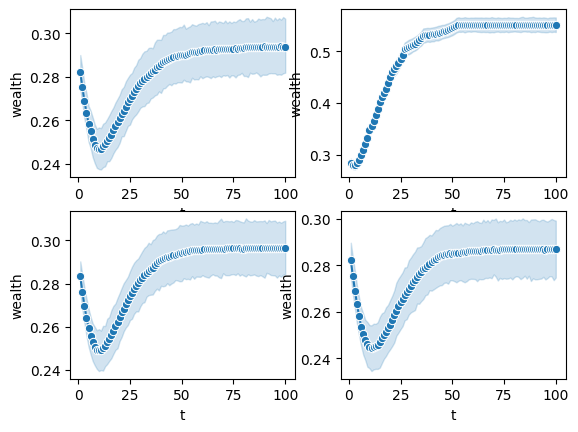

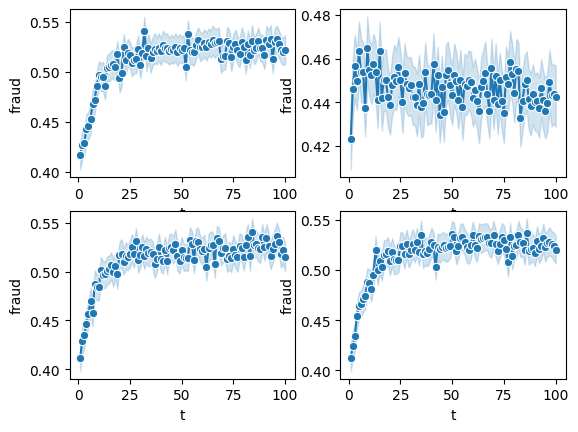

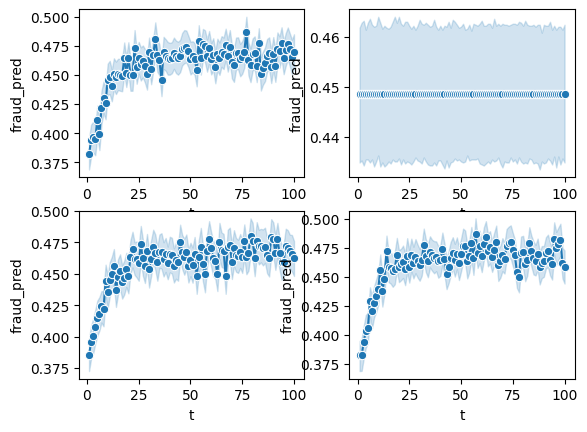

In [53]:
viz(data, 'wealth', 'race')
viz(data, 'fraud_pred', 'race')
viz(data, 'fraud', 'race')

viz(data, 'wealth', 'gender')
viz(data, 'fraud_pred', 'gender')
viz(data, 'fraud', 'gender')

viz(data, 'wealth', 'misclassifications')
viz(data, 'fraud_pred', 'misclassifications')
viz(data, 'fraud', 'misclassifications')

viz(data, 'wealth', 'intersect')
viz(data, 'fraud_pred', 'intersect')
viz(data, 'fraud', 'intersect')

viz2(data, 'wealth')
viz2(data, 'fraud')
viz2(data, 'fraud_pred')

In [ ]:



# viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

# viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud_pred'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])



# viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])

# viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])


# viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['gender'], (df_baseline['misclassifications']), title= 'Misclassification of MLP') #, df_baseline['convicted'])

# viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'])
# viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'])
# viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud_pred'])


In [ ]:
# viz(df, df.index.get_level_values('t'), df['wealth'], abs(df['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['wealth'], df['intersect'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['fraud'], df['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# # viz(df_b, df.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['fraud'])
# viz2(df, df.index.get_level_values('t'), df['fraud_pred'])

/Users/uni/Documents/Git/abm/basic/utils.py:73: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:73: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                       wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         28     1   0.190037  0.37454           0      0     1       0   
                 2   0.220322  0.37454           0      1     1       0   
                 3   0.249885  0.37454           0      1     1       0   
                 4   0.278251  0.37454           0      0     1       0   
                 5   0.302061  0.37454           0      0     1       0   
...                       ...      ...         ...    ...   ...     ...   
1         99     46 -0.318078  0.37454           1      1     0       1   
                 47 -0.318960  0.37454           1      1     0       1   
                 48 -0.319576  0.37454           1      1     0       1   
                 49 -0.318685  0.37454           1      1     0       1   
                 50 -0.319393  0.37454           1      1     0       1   

                     con

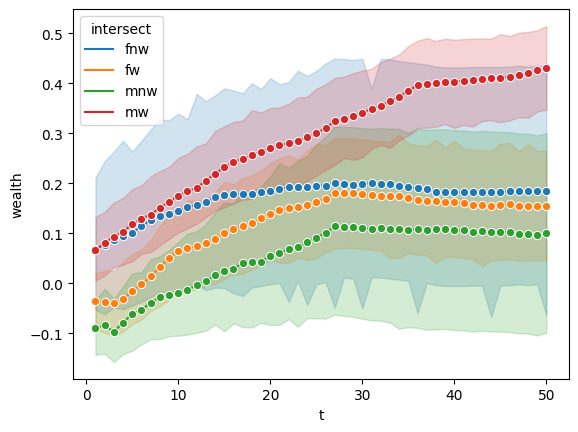

In [ ]:
df_xb = delta_function('intersect', 'wealth', , df)
print(df_xb)
viz(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])